In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from func import *
import json
import ast

In [2]:
df = pd.read_csv("refine_merged_df.csv")
print(df.shape)
print(df.columns)
df.head()

(6334, 18)
Index(['image_file', 'center', 'scale', 'score', 'bbox', 'width', 'height',
       'size', 'x', 'y', 'entropy', 'laplacian', 'brightness', 'B_sd', 'red',
       'blue', 'green', 'color_var'],
      dtype='object')


,image_file,center,scale,score,bbox,width,height,size,x,y,entropy,laplacian,brightness,B_sd,red,blue,green,color_var
0,val2017/000000152686.jpg,"[318.7799987792969, 205.77999877929688]","[1.7105625867843628, 2.280750036239624]",0.960156,"[231.39, 23.32, 175.78, 365.92]",175.78,365.92,64321.4176,231.39,23.32,6.991802,2396.599312,109.016344,55.437876,89.456751,116.950716,117.504579,5611.808144
1,val2017/000000356505.jpg,"[310.1300048828125, 220.11500549316406]","[1.2599530220031738, 1.6799376010894775]",0.946107,"[222.64, 85.72, 175.98, 269.79]",175.98,269.79,47477.6442,222.64,85.72,7.640442,4402.490432,136.528625,57.042084,143.867764,132.133001,133.655104,3492.515846
2,val2017/000000127270.jpg,"[162.24000549316406, 270.19000244140625]","[2.075343608856201, 2.767125129699707]",0.945302,"[39.11, 48.82, 247.26, 443.74]",247.26,443.74,109719.1524,39.11,48.82,7.261376,1511.846484,138.665786,52.863906,129.274911,145.894198,142.042158,3423.989375
3,val2017/000000097988.jpg,"[257.364990234375, 404.5199890136719]","[1.8068437576293945, 2.4091248512268066]",0.942805,"[195.29, 211.79, 125.15, 386.46]",125.15,386.46,48365.4690,195.29,211.79,7.541892,7403.016087,98.924808,55.624675,94.581389,78.445679,105.133637,3633.292748
4,val2017/000000021879.jpg,"[339.6600036621094, 192.43499755859375]","[1.0657968521118164, 1.4210624694824219]",0.941582,"[274.43, 78.75, 131.46, 228.37]",131.46,228.37,30021.5202,274.43,78.75,7.315833,3676.558615,153.935550,39.944085,155.740893,157.968963,152.236608,1901.065476


In [3]:
# 정렬 확인
df.score.head(20)

0     0.960156
1     0.946107
2     0.945302
3     0.942805
4     0.941582
5     0.941547
6     0.940140
7     0.938948
8     0.938645
9     0.937699
10    0.935784
11    0.935221
12    0.934887
13    0.934448
14    0.934214
15    0.933999
16    0.933420
17    0.933344
18    0.933064
19    0.932366
Name: score, dtype: float64

<Axes: title={'center': '전체 score 분포'}>

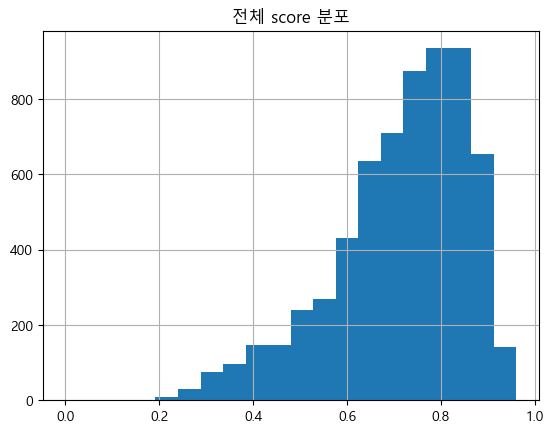

In [4]:
# score 분포
plt.title("전체 score 분포")
df['score'].hist(bins=20)

낮은 score 임의의 thr = 0.6으로 해보자

In [5]:
high_score = df[df['score']>0.85]
low_score = df[df['score']<0.6]

In [6]:
print("low score", len(low_score))
print("high_score", len(high_score))
print("전체", len(df))

low score 1204
high_score 1030
전체 6334


In [7]:
1030/6334

0.1626144616356173

## 1. Entropy

<Axes: title={'center': '전체 score 정렬 bbox'}>

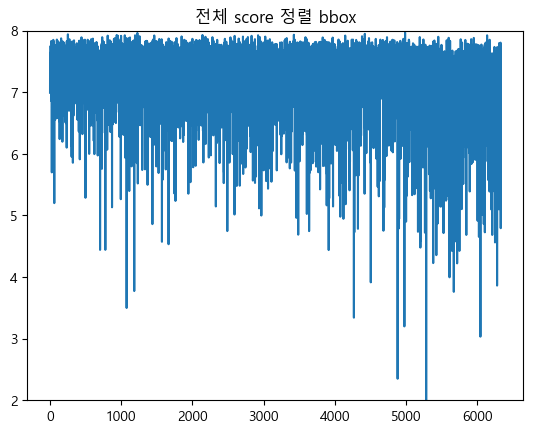

In [8]:
plt.title("전체 score 정렬 bbox")
plt.ylim(2,8)
df['entropy'].plot()

<Axes: title={'center': 'high_score'}, xlabel='score 정렬 bbox', ylabel='entropy'>

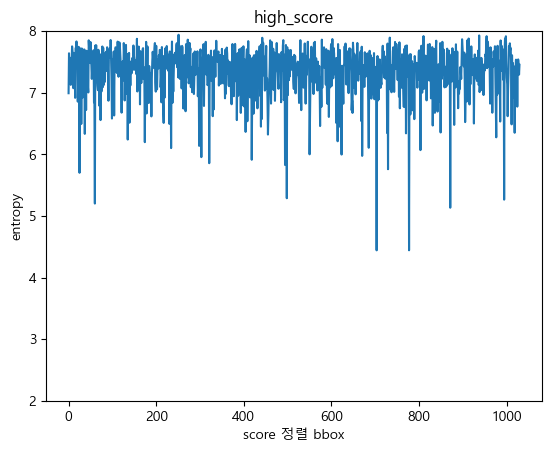

In [9]:
plt.title("high_score")
plt.xlabel("score 정렬 bbox")
plt.ylabel("entropy")
plt.ylim(2,8)
high_score['entropy'].plot()

<Axes: title={'center': 'low_score'}, xlabel='score 정렬 bbox', ylabel='entropy'>

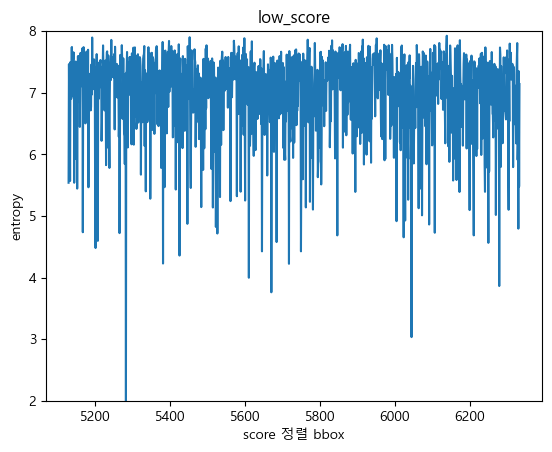

In [10]:
plt.title("low_score")
plt.xlabel("score 정렬 bbox")
plt.ylabel("entropy")
plt.ylim(2,8)
low_score['entropy'].plot()

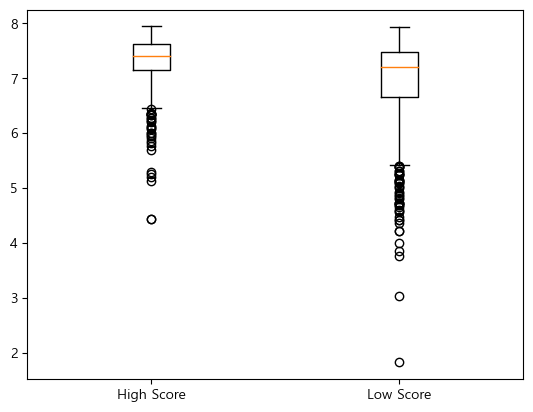

In [11]:
plt.boxplot([high_score['entropy'], low_score['entropy']], labels=['High Score', 'Low Score'])
plt.show()

In [12]:
df['entropy'].describe()

count    6334.000000
mean        7.189730
std         0.564621
min         1.826074
25%         6.978891
50%         7.333335
75%         7.573073
max         7.970288
Name: entropy, dtype: float64

In [13]:
high_score['entropy'].describe()

count    1030.000000
mean        7.326077
std         0.412508
min         4.441361
25%         7.146713
50%         7.407969
75%         7.614370
max         7.941068
Name: entropy, dtype: float64

In [14]:
low_score['entropy'].describe()

count    1204.000000
mean        6.980384
std         0.709057
min         1.826074
25%         6.656750
50%         7.201698
75%         7.477321
max         7.924931
Name: entropy, dtype: float64

## 2. sharpness - Laplacian

<Axes: title={'center': '(score 정렬) 전체 bbox laplacian'}>

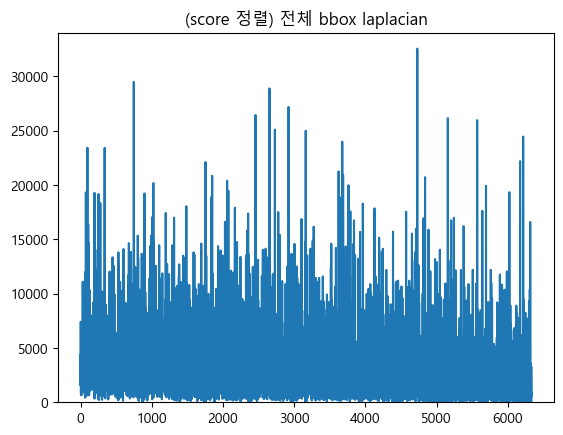

In [15]:
plt.title("(score 정렬) 전체 bbox laplacian")
plt.ylim(0,34000)
df['laplacian'].plot()

<Axes: title={'center': 'high_score의 laplacian'}, xlabel='score 정렬 bbox', ylabel='laplacian'>

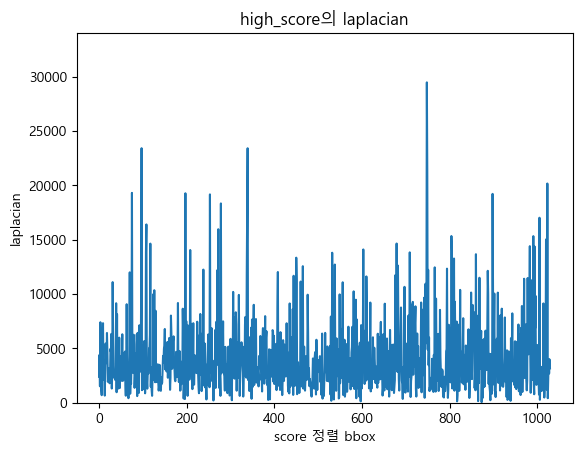

In [16]:
plt.title("high_score의 laplacian")
plt.xlabel("score 정렬 bbox")
plt.ylabel("laplacian")
plt.ylim(0,34000)
high_score['laplacian'].plot()

<Axes: title={'center': 'low_score의 laplacian'}, xlabel='score 정렬 bbox', ylabel='laplacian'>

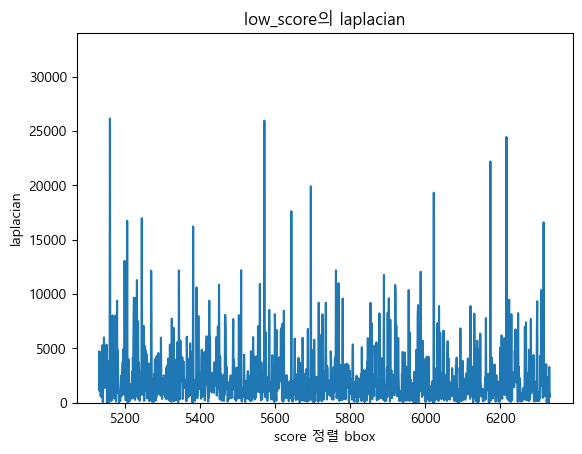

In [17]:
plt.title("low_score의 laplacian")
plt.xlabel("score 정렬 bbox")
plt.ylabel("laplacian")
plt.ylim(0,34000)
low_score['laplacian'].plot()

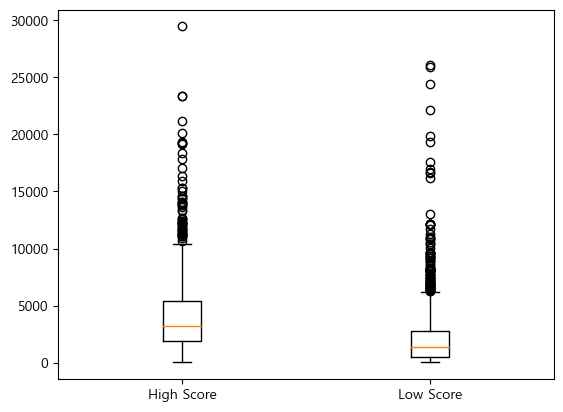

In [18]:
plt.boxplot([high_score['laplacian'], low_score['laplacian']], labels=['High Score', 'Low Score'])
plt.show()

In [19]:
print(np.mean(high_score['laplacian']))
print(np.mean(low_score['laplacian']))
print(np.mean(df['laplacian']))

4149.7564708057635
2268.6863205736704
3402.332890220769


## 3. brightness

<Axes: title={'center': 'low score brightness'}>

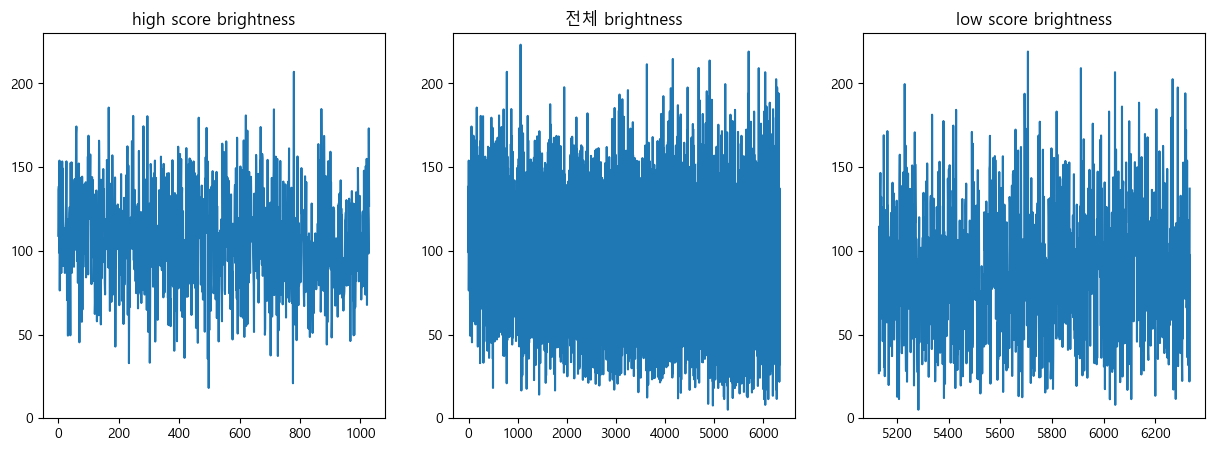

In [43]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("high score brightness")
plt.ylim(0,230)
high_score['brightness'].plot()

plt.subplot(1,3,2)
plt.title("전체 brightness")
plt.ylim(0,230)
df['brightness'].plot()

plt.subplot(1,3,3)
plt.title("low score brightness")
plt.ylim(0,230)
low_score['brightness'].plot()

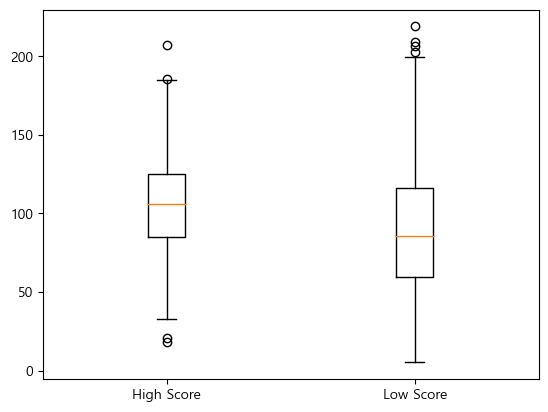

In [45]:
plt.boxplot([high_score['brightness'], low_score['brightness']], labels=['High Score', 'Low Score'])
plt.show()

In [44]:
print(np.mean(high_score['brightness']))
print(np.mean(low_score['brightness']))
print(np.mean(df['brightness']))

106.0469453402271
88.27702565114278
94.63086820706677


### 4. RGB

<Axes: title={'center': 'low score color_var'}>

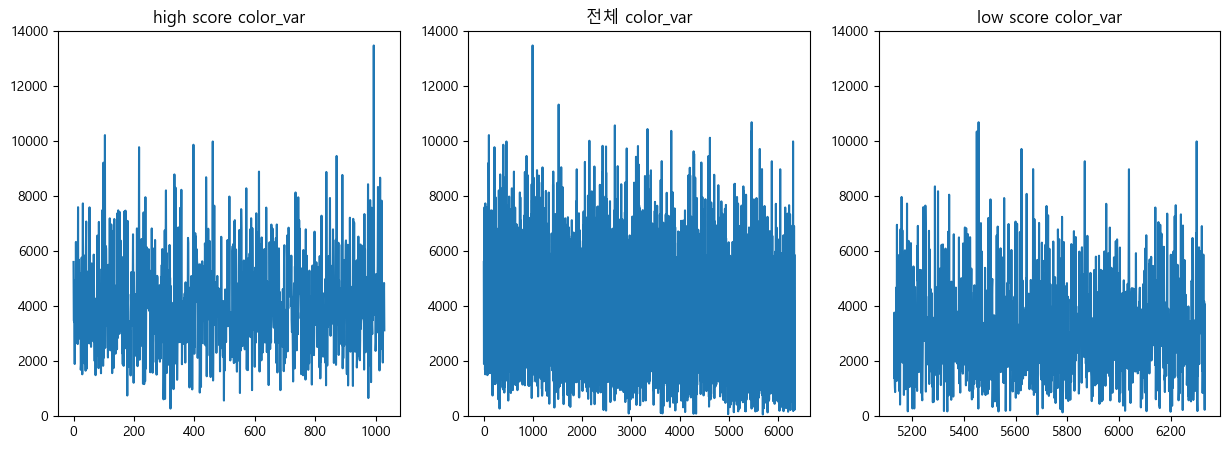

In [52]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("high score color_var")
plt.ylim(0,14000)
high_score['color_var'].plot()

plt.subplot(1,3,2)
plt.title("전체 color_var")
plt.ylim(0,14000)
df['color_var'].plot()

plt.subplot(1,3,3)
plt.title("low score color_var")
plt.ylim(0,14000)
low_score['color_var'].plot()

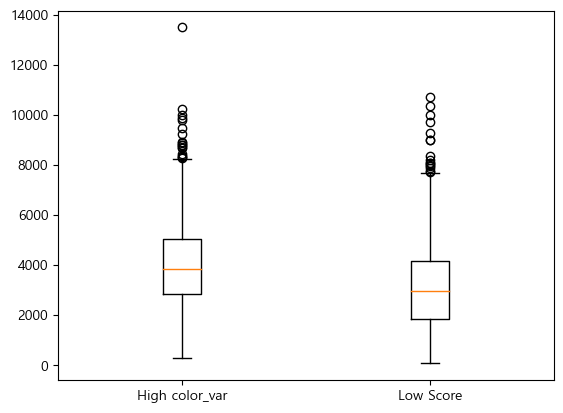

In [53]:
plt.boxplot([high_score['color_var'], low_score['color_var']], labels=['High color_var', 'Low Score'])
plt.show()

In [54]:
print(np.mean(high_score['color_var']))
print(np.mean(low_score['color_var']))
print(np.mean(df['color_var']))

4032.948863610852
3156.4444431562088
3611.4411490427706


In [25]:
numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()['score'].sort_values(ascending=False)

# 결과 출력
print(correlations)

score         1.000000
height        0.221794
entropy       0.205262
laplacian     0.190387
B_sd          0.154164
green         0.152497
color_var     0.149974
brightness    0.139628
blue          0.130895
size          0.105505
red           0.103451
width         0.042008
y             0.018130
x            -0.023363
Name: score, dtype: float64
